## Some obervations of $N' = rN(1 - \frac{N}{k\alpha})$ 
Where N = population density, r = growth rate, k = carrying capacity, $\alpha$ = stochastic parameter

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Parameters
r = 0.1
K = 1000
y0 = 100
alpha_mean = 1.0
alpha_std = 0.1
sigma = 0.1

In [6]:
# Time parameters
t_start = 0
t_end = 3650
num_points = 5000
dt = (t_end - t_start) / num_points

### Euler-Maruyama Method

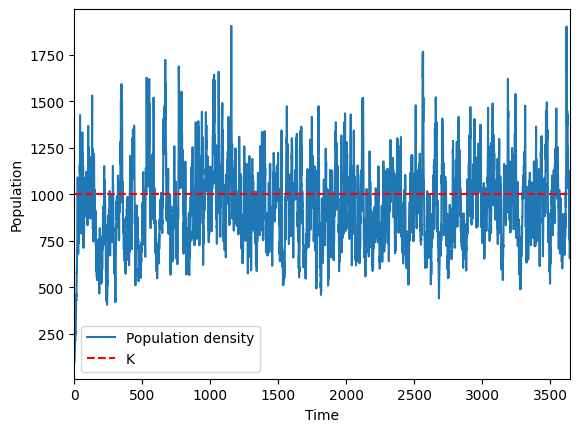

In [10]:
# Generate Wiener increments
dW = np.sqrt(dt) * np.random.randn(num_points)

# Generate alpha values with some stochasticity
alpha_values = alpha_mean + alpha_std * np.random.randn(num_points)

# Initialize arrays
t = np.linspace(t_start, t_end, num_points)
y = np.zeros_like(t)
y[0] = y0

# Euler-Maruyama method
for i in range(1, num_points):
    drift = r * y[i-1] * (1 - y[i-1] / (alpha_values[i] * K)) * dt
    diffusion = sigma * y[i-1] * dW[i-1]
    y[i] = y[i-1] + drift + diffusion

# Plot the solution
plt.plot(t, y, label='Population density')
plt.axhline(K, label='K', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.xlim(0, t_end)
# plt.title('Stochastic Logistic Growth with Euler-Maruyama Method')
plt.legend()
plt.show()